# Desarrollo Tarea 4

#### **Estudiantes:** 
* Omar David Toledo Leguizamón (202424446)
* Jose Miguel Alvearte (202010602)

Antes de entrar a los problemas de grafos, vamos a diseñar un conjunto de rutinas que nos permitirán visualizar los grafos

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_weighted_graph(edges, directed=True, mst = []):
    """
    Plots a graph with curved edges and edge labels placed over the curves.
    
    Parameters:
    edges (list of tuples): Each tuple should contain three elements:
                            (source, destination, cost).
    
    Returns:
    None: Displays the graph plot with curved edges and edge labels.
    """
    # Create a directed or undirected graph based on the parameter
    G = nx.DiGraph() if directed else nx.Graph()
    rad = '0.3' if directed else '0'
    
    # Add edges to the graph from the provided edge list
    for edge in edges:
        source, destination, cost = edge
        G.add_edge(source, destination, weight=cost)  # Include the cost as edge weight

    colors = ['red' if edge in mst or edge[::-1] in mst else 'black' for edge in G.edges()]

    # Use the circular layout algorithm for positioning the nodes
    pos = nx.circular_layout(G)

    plt.figure(figsize=(9, 6))  # Set the figure size

    # Draw the graph nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw the edges with curved connections and arrowheads
    if directed:
        nx.draw_networkx_edges(
            G, pos, 
            connectionstyle=f'arc3,rad={rad}',  # Curve the edges
            arrowstyle='-|>',  # Use arrowheads for directed edges
            arrowsize=20,  # Size of the arrowheads
            edge_color=colors
        )
    else:
        nx.draw_networkx_edges(
            G, pos, edge_color=colors
        )


    # Create a dictionary for edge labels based on edge weights
    edge_labels = {(u, v): f'{G[u][v]["weight"]}' for u, v in G.edges()}

    # Draw the edge labels positioned along the curved edges
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels,
        label_pos=0.5,  # Position labels at the midpoint of edges
        connectionstyle=f'arc3,rad={rad}',  # Curve the labels along with the edges
        rotate=False  # Do not rotate labels
    )

    plt.show()  # Display the graph

def plot_unweighted_graph(edges, directed=True):
    """
    Plots an unweighted graph with optional directionality.
    
    Parameters:
    edges (list of tuples): Each tuple should contain two elements:
                            (source, destination).
    
    Returns:
    None: Displays the unweighted graph plot.
    """
    # Create a directed or undirected graph based on the parameter
    G = nx.DiGraph() if directed else nx.Graph()
    rad = '0.1' if directed else '0'

    # Add edges to the graph from the provided edge list
    for edge in edges:
        source, destination = edge
        G.add_edge(source, destination)  # Add the edge without weights
    # Use the circular layout algorithm for positioning the nodes
    pos = nx.circular_layout(G)

    plt.figure(figsize=(9, 6))  # Set the figure size

    # Draw the graph nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

    # Draw the node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Draw the edges with curved connections and arrowheads
    if directed:
        nx.draw_networkx_edges(
            G, pos, 
            connectionstyle=f'arc3,rad={rad}',  # Curve the edges
            arrowstyle='-|>',  # Use arrowheads for directed edges
            arrowsize=20  # Size of the arrowheads
        )
    else:
        nx.draw_networkx_edges(
            G, pos
        )

    plt.show()  # Display the graph

def plot_graph(edges, weighted=True, directed=True, mst = []):
    """
    Wrapper function to plot either a weighted or unweighted graph.
    
    Parameters:
    edges (list of tuples): Edge list, either weighted or unweighted.
    weighted (bool): Indicates whether to plot a weighted graph.
    directed (bool): Indicates whether the graph is directed.
    
    Returns:
    None: Displays the graph plot.
    """
    if weighted: 
        plot_weighted_graph(edges, directed=directed, mst = mst)  # Call the function for weighted graphs
    else: 
        plot_unweighted_graph(edges, directed=directed)  # Call the function for unweighted graphs

def read_edge_list_from_file(filename):
    """
    Reads an edge list from a text file and returns it as a list of tuples.
    
    Parameters:
    filename (str): The path to the text file containing the edge list.
    
    Returns:
    list: A list of tuples where each tuple contains (source, destination, cost).
    """
    edges = []  # Initialize an empty list to store edges
    
    # Open the specified file in read mode
    with open(filename, 'r') as file:
        for line in file:  # Iterate over each line in the file
            parts = line.split()  # Split the line into parts
            if len(parts) == 3:  # Ensure there are exactly three parts
                source, destination, cost = map(int, parts)  # Convert strings to integers
                edges.append((source, destination, cost))  # Add the edge to the list
            if len(parts) == 2:  # Ensure there are exactly two parts
                source, destination = map(int, parts)  # Convert strings to integers
                edges.append((source, destination))  # Add the edge to the list
    
    return edges  # Return the list of edges


## Parte 1. Caminos de Costos mínimos

Para la solución de este primer problema, se definió la siguiente estructura para el algoritmo:

**1. Entradas y Salidas**

| E/S | Nombre | tipo | Descripción |
|-|-|-|-|
| E | G | **List** of **tuples** | Lista que contiene las relaciones entre nodos, se encuentra como tres números separados que describen el nodo de salida, el nodo destino y el costo|
| S | m | **Array** of **Array** of **int**| Matriz de costos mínimos para cada par de nodos del grafo |

**2. Tipo de grafo**

Para el problema en cuestión, se definió un grafo dirigido con costo positivo en cada eje (Esto para poder implementar Djikstra sin mayor problema)

**3. Estrategias de solución**

Para este problema, se implemementó la solución usando alguno de los siguientes tres algoritmos:

* Floyd-Warshall
* Dijkstra aplicado a cada nodo
* BellmanFord aplicado a cada nodo

Independientemente del algoritmo utilizado, la respuesta debe ser la misma en los tres casos.

En el proyecto de JAVA adjunto, se definió el código que recibe la lista de aristas con sus pesos y obtiene la matriz de costos mínimos. Podemos probar el código con la matriz de ejemplo de 5 nodos para ver el resultado que se obtiene

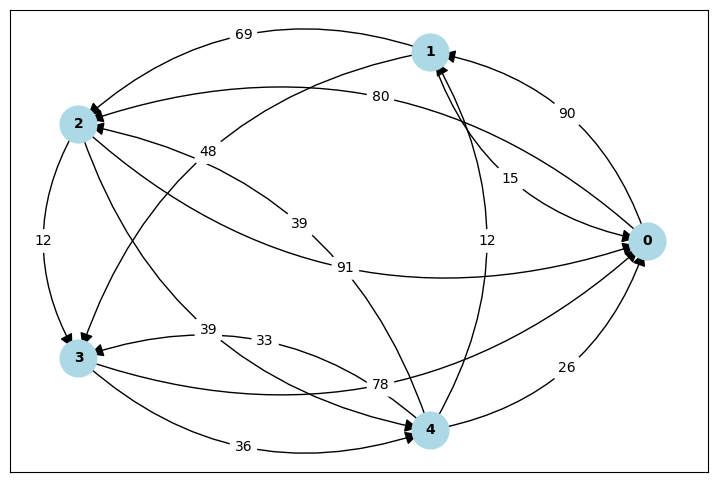

In [151]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P1\distances5.txt')
plot_graph(edges,directed=True,weighted=True)

In [155]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_Dijkstra.txt" 1



Minimum Cost Matrix using Dijkstra: 

      |    0    1    2    3    4
---------------------------------
    0 |    0   90   80   92  119
    1 |   15    0   69   48   84
    2 |   65   51    0   12   39
    3 |   62   48   75    0   36
    4 |   26   12   39   33    0

Execution time in microseconds using Dijkstra for 5 nodes graph: 2009


In [156]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_BellManFord.txt" 1



Minimum Cost Matrix using BellmanFord: 

      |    0    1    2    3    4
---------------------------------
    0 |    0   90   80   92  119
    1 |   15    0   69   48   84
    2 |   65   51    0   12   39
    3 |   62   48   75    0   36
    4 |   26   12   39   33    0

Execution time in microseconds using BellmanFord for 5 nodes graph: 591


In [157]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_FloydWarshall.txt" 1



Minimum Cost Matrix using FloydWarshall: 

      |    0    1    2    3    4
---------------------------------
    0 |    0   90   80   92  119
    1 |   15    0   69   48   84
    2 |   65   51    0   12   39
    3 |   62   48   75    0   36
    4 |   26   12   39   33    0

Execution time in microseconds using FloydWarshall for 5 nodes graph: 77


Dado que tenemos los archivos para verificar el resultado de las respuestas más grandes, diseñamos una función que realice dicha verificación

In [24]:
import numpy as np

def check_matrices_identical(file1, file2):
    """
    Loads two matrices from text files and checks if they are identical.

    Parameters:
        file1 (str): The name of the first file.
        file2 (str): The name of the second file.

    Returns:
        bool: True if the matrices are identical, False otherwise.
    """
    def load_matrix(filename):
        """Helper function to load a matrix from a file."""
        return np.loadtxt(filename, delimiter='\t')

    # Load both matrices
    matrix1 = load_matrix(file1)
    matrix2 = load_matrix(file2)

    if not np.array_equal(matrix1, matrix2):
        print("Matrices are different. Locations of differences:")
    else:
        print('Matrices are equal')
    
    # Create a boolean array that is True where elements differ
    differences = matrix1 != matrix2
    
    # Get the indices of the differing elements
    differing_indices = np.argwhere(differences)

    for index in differing_indices:
        row, col = index
        print(f"Difference at (row {row}, column {col}): {matrix1[row, col]} != {matrix2[row, col]}")


Vamos a generar las salidas para cada conjunto de datos

In [158]:
#Solucionamos los problemas con Floyd-Warshall

!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\Inputs\P1\distancesDisconnected.txt" "data\Outputs\P1\MinCostSolutionDisconnected_FloydWarshall.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_FloydWarshall.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\Inputs\P1\distances100.txt" "data\Outputs\P1\MinCostSolution100_FloydWarshall.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost FloydWarshall "data\Inputs\P1\distances1000.txt" "data\Outputs\P1\MinCostSolution1000_FloydWarshall.txt" 0

Execution time in microseconds using FloydWarshall for 4 nodes graph: 65
Execution time in microseconds using FloydWarshall for 5 nodes graph: 88
Execution time in microseconds using FloydWarshall for 100 nodes graph: 17845
Execution time in microseconds using FloydWarshall for 1000 nodes graph: 2690216


In [159]:
#Solucionamos los problemas con Dijkstra

!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\Inputs\P1\distancesDisconnected.txt" "data\Outputs\P1\MinCostSolutionDisconnected_Dijkstra.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_Dijkstra.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\Inputs\P1\distances100.txt" "data\Outputs\P1\MinCostSolution100_Dijkstra.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost Dijkstra "data\Inputs\P1\distances1000.txt" "data\Outputs\P1\MinCostSolution1000_Dijkstra.txt" 0

Execution time in microseconds using Dijkstra for 4 nodes graph: 1738
Execution time in microseconds using Dijkstra for 5 nodes graph: 1784
Execution time in microseconds using Dijkstra for 100 nodes graph: 71961
Execution time in microseconds using Dijkstra for 1000 nodes graph: 54541248


In [160]:
#Solucionamos los problemas con BellmanFord

!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\Inputs\P1\distancesDisconnected.txt" "data\Outputs\P1\MinCostSolutionDisconnected_BellmanFord.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\Inputs\P1\distances5.txt" "data\Outputs\P1\MinCostSolution5_BellmanFord.txt" 0
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\Inputs\P1\distances100.txt" "data\Outputs\P1\MinCostSolution100_BellmanFord.txt" 0
#!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations minCost BellmanFord "data\Inputs\P1\distances1000.txt" "data\Outputs\P1\MinCostSolution1000_BellmanFord.txt" 0

Execution time in microseconds using BellmanFord for 4 nodes graph: 114
Execution time in microseconds using BellmanFord for 5 nodes graph: 440
Execution time in microseconds using BellmanFord for 100 nodes graph: 1426563


Verificamos que las soluciones sean correctas cruzando los resultados de los tres metodos

In [164]:
#Checking Solutions for distance100

path = 'Java Projects\GraphsImplementations\data\Outputs\P1'
check_matrices_identical(path+'\MinCostSolution100_Dijkstra.txt',path+'\MinCostSolution100_FloydWarshall.txt')
check_matrices_identical(path+'\MinCostSolution100_Dijkstra.txt',path+'\MinCostSolution100_BellmanFord.txt')
check_matrices_identical(path+'\MinCostSolution100_FloydWarshall.txt',path+'\MinCostSolution100_BellmanFord.txt')

Matrices are equal
Matrices are equal
Matrices are equal


In [165]:
#Checking Solutions for distance1000

path = 'Java Projects\GraphsImplementations\data\Outputs\P1'
check_matrices_identical(path+'\MinCostSolution1000_Dijkstra.txt',path+'\MinCostSolution1000_FloydWarshall.txt')
check_matrices_identical(path+'\MinCostSolution1000_Dijkstra.txt',path+'\MinCostSolution1000_BellmanFord.txt')
check_matrices_identical(path+'\MinCostSolution1000_FloydWarshall.txt',path+'\MinCostSolution1000_BellmanFord.txt')

Matrices are equal


FileNotFoundError: Java Projects\GraphsImplementations\data\Outputs\P1\MinCostSolution1000_BellmanFord.txt not found.

In [166]:
#Checking Solutions for distance5

path = 'Java Projects\GraphsImplementations\data\Outputs\P1'
check_matrices_identical(path+'\MinCostSolution5_Dijkstra.txt',path+'\MinCostSolution5_FloydWarshall.txt')
check_matrices_identical(path+'\MinCostSolution5_Dijkstra.txt',path+'\MinCostSolution5_BellmanFord.txt')
check_matrices_identical(path+'\MinCostSolution5_FloydWarshall.txt',path+'\MinCostSolution5_BellmanFord.txt')

Matrices are equal
Matrices are equal
Matrices are equal


In [167]:
#Checking Solutions for distanceDisconnected

path = 'Java Projects\GraphsImplementations\data\Outputs\P1'
check_matrices_identical(path+'\MinCostSolutionDisconnected_Dijkstra.txt',path+'\MinCostSolutionDisconnected_FloydWarshall.txt')
check_matrices_identical(path+'\MinCostSolutionDisconnected_Dijkstra.txt',path+'\MinCostSolutionDisconnected_BellmanFord.txt')
check_matrices_identical(path+'\MinCostSolutionDisconnected_FloydWarshall.txt',path+'\MinCostSolutionDisconnected_BellmanFord.txt')

Matrices are equal
Matrices are equal
Matrices are equal


De ese modo, podemos organizar los tiempos de ejecución en microsegundos ($\mu s$) en la siguiente tabla:

| **Entrada** | **Floyd-Warshall** | **BellmanFord** | **Dijkstra** |
|-|-|-|-|
| distanceDisconnected | 109 | 182 | 2030 |
| distance5 | 100 | 459 | 2893 |
| distance100 | 19476 | 1702462 | 73473 |
| distance1000 | 3097361 | 16554092653 | 64510402 |

Lo cual es equivalente a la siguiente en formato de horas, minutos y segundos:

| **Entrada**          | **Floyd-Warshall**   | **BellmanFord**   | **Dijkstra**        |
|----------------------|----------------------|-------------------|---------------------|
| distanceDisconnected | 00:00:00             | 00:00:00          | 00:00:00            |
| distance5            | 00:00:00             | 00:00:00          | 00:00:00            |
| distance100          | 00:00:00             | 00:00:01          | 00:00:00            |
| distance1000         | 00:00:03             | 04:35:54          | 00:01:04            |





## Parte 2. Componentes Conectados

Para la solución de este segundo problema, se definió la siguiente estructura para el algoritmo:

**1. Entradas y Salidas**

| E/S | Nombre | tipo | Descripción |
|-|-|-|-|
| E | G | **List** of **tuples** | Lista que contiene las relaciones entre nodos, se encuentra como dos números separados que describen el nodo de salida y el nodo destino|
| S | m | **List** of **List** of **int**| Componentes disyuntos del grafo ingresado |

**2. Tipo de grafo**

Para el problema en cuestión, se definió un grafo no dirigido sin costos.

**3. Estrategias de solución**

Para este problema, se implemementó la solución usando BFS.

En el proyecto adjunto, se realizó una implmentación de BFS para determinar los componentes conectados de un grafo. Se utilizará como principal ejemplo el siguiente grafo:

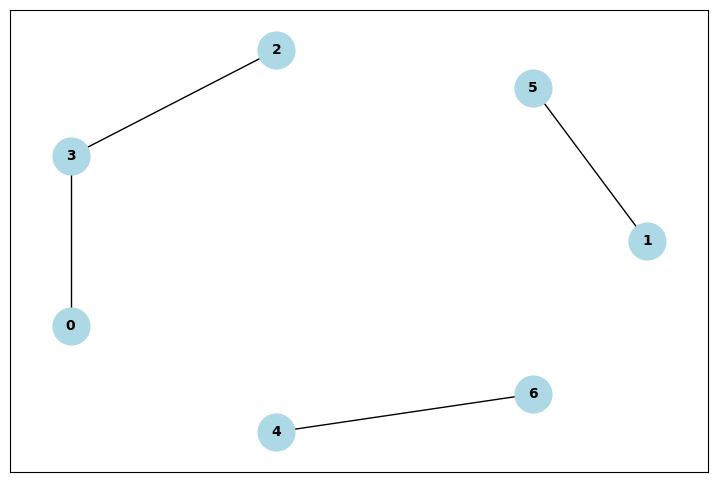

In [168]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P2\componentsExample.txt')
plot_graph(edges,directed=False,weighted=False)

In [169]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations components BFS "data\Inputs\P2\componentsExample.txt" "data\Outputs\P2\SolutionExample.txt" 1


Components found using BFS: {{0,3,2},{1,5},{4,6}} 

Execution time in microseconds using BFS for 7 nodes graph: 411


Con el fin de validar visualmente el algoritmo, se buscará implementar con dos grafos adicionales. Uno conexo y uno donde cada eje esta conectado unica y exclusivamente a si mismo.

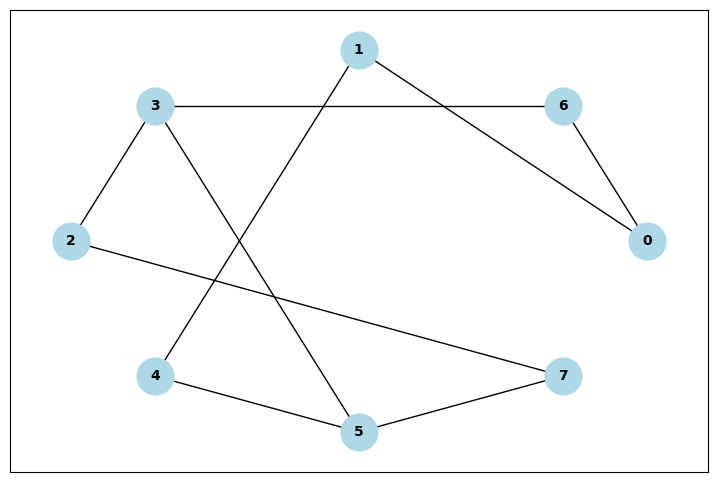

In [170]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P2\componentsConnected.txt')
plot_graph(edges,directed=False,weighted=False)

In [171]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations components BFS "data\Inputs\P2\componentsConnected.txt" "data\Outputs\P2\SolutionConnected.txt" 1


Components found using BFS: {{0,6,1,3,4,2,5,7}} 

Execution time in microseconds using BFS for 8 nodes graph: 579


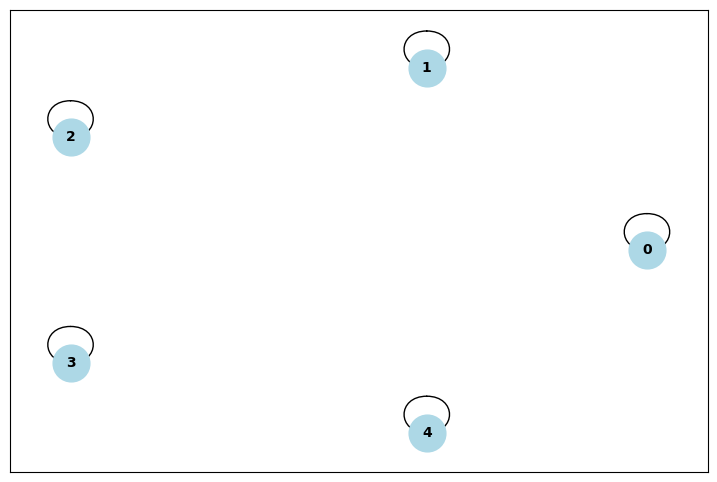

In [172]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P2\componentsIsolated.txt')
plot_graph(edges,directed=False,weighted=False)

In [173]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations components BFS "data\Inputs\P2\componentsIsolated.txt" "data\Inputs\P2\SolutionIsolated.txt" 1


Components found using BFS: {{0},{1},{2},{3},{4}} 

Execution time in microseconds using BFS for 5 nodes graph: 500


## Parte 3. Problema de la ciudad y costos viales

Una ciudad se diseño de tal modo que todas sus calles fueran de una
sola vía. Con el paso del tiempo la cantidad de habitantes de la ciudad creció y
esto produjo grandes trancones en algunas de las vias debido a algunos desvíos
innecesarios que tienen que tomar los habitantes de la ciudad para poder llegar
a sus trabajos. Por lo tanto, el alcalde tomó la decisión de ampliar algunas vias
para que puedan convertirse en doble via. Dado el mapa de la ciudad y el costo
de convertir cada via actual en doble via, determinar qué vias se deben
convertir, de modo que se pueda transitar de cualquier punto a cualquier punto
de la ciudad por dobles vias y que el costo de la conversión sea el mínimo
posible.

Para la solución de este tercer problema, se definió la siguiente estructura para el algoritmo:

**1. Entradas y Salidas**

| E/S | Nombre | tipo | Descripción |
|-|-|-|-|
| E | G | **List** of **tuples** of **int** | Lista que contiene el costo de ampliar una via que une un punto A y B de la ciudad, descrito como (A,B,costo)|
| S | R | **List** of **tuples** | Lista de vías que deben ser ampliadas de tal forma que el costo sea mínimo |

**2. Tipo de grafo**

Para el problema en cuestión, se definió un grafo no dirigido conexo con costo positivo en cada eje. Esta estructura se definió con los siguientes criterios:

* **Vértices**: Representan los puntos de la ciudad que unen las vías. Se pueden entender como las intersecciones entre las mismas.

* **Aristas**: Representan la existencia de una vía que une dos puntos de la ciudad.

* **Costos de las aristas**: Las aristas contarán con costos positivos que representarán el valor de convertir dicha vía en doble vía.

* **Conectividad**: El grafo, dado el contexto del problema, debe ser conexo, ya que al reprsentar las vías de una ciudad, podemos decir que de cualquier punto de la ciudad se debe poder llegar a otro.

* **Dirigido o no dirigido**: Dado el contexto del problema, se definió que el grafo fuese no dirigido ya que la única información que nos interesa represntar es la existencia de vías y no la dirección a la que apunta.

**3. Estrategias de solución**

Para este problema, nos interesa definir que vías deben convertirse en doble vía para poder conectar todos los puntos de la ciudad con un costo mínimo. Esto es equivalente a encontrar un conjunto de aristas que recubran todos los vértices del grafo minimizando el costo, o en otras palabras, estamos frente al problema del árbol mínimo recubrimiento (MST).

Por consiguiente, para afrontar este problema, se utilizará el algoritmo de Kruskal

Vamos a tomar los siguientes grafos de ejemplo:

1. Grafo de 7 nodos

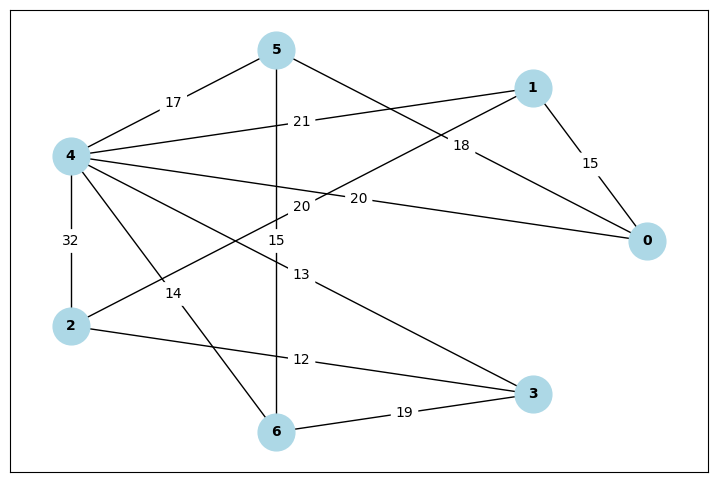

In [174]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P3\ProblemsCity7.txt')
plot_graph(edges,directed=False,weighted=True)

In [175]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations Problems CityCosts "data\Inputs\P3\ProblemsCity7.txt" "data\Outputs\P3\SolutionsCity7.txt" 1


Edges from MST: {(2,3),(4,3),(4,6),(0,1),(5,6),(0,5)} 
The minimum cost associated is: 87

Execution time in microseconds using CityCosts for 7 nodes graph: 1308


Vamos a visualizar el arbol de recubrimiento resultante, que es equivalente a las vías que deben transformarse en doble vía

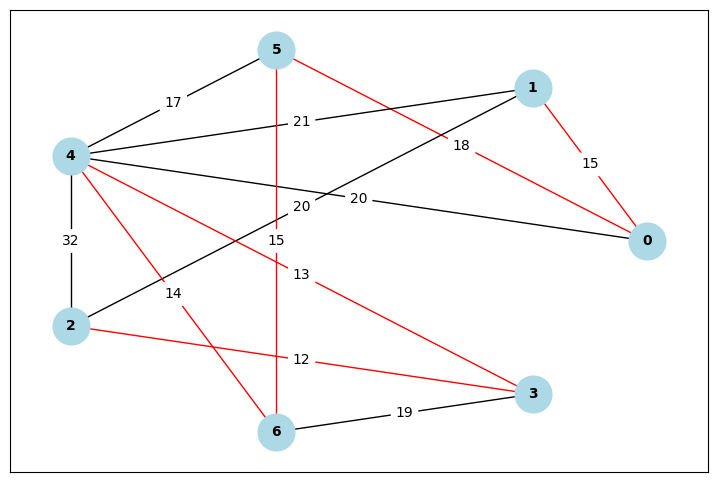

In [176]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P3\ProblemsCity7.txt')
mst = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Outputs\P3\SolutionsCity7.txt')
plot_graph(edges,directed=False,weighted=True,mst = mst)

2. Grafo de 5 nodos

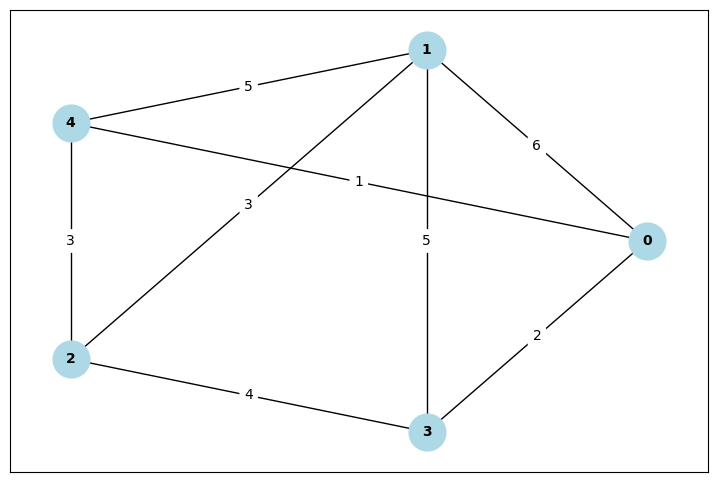

In [147]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\ProblemsCity5.txt')
plot_graph(edges,directed=False,weighted=True)

In [178]:
!cd "Java Projects\GraphsImplementations" && javac -d bin src/uniandes/algorithms/graphs/*.java && java -cp bin uniandes.algorithms.graphs.GraphImplementations Problems CityCosts "data\Inputs\P3\ProblemsCity5.txt" "data\Outputs\P3\SolutionsCity5.txt" 1


Edges from MST: {(0,4),(0,3),(2,4),(1,2)} 
The minimum cost associated is: 9

Execution time in microseconds using CityCosts for 5 nodes graph: 1646


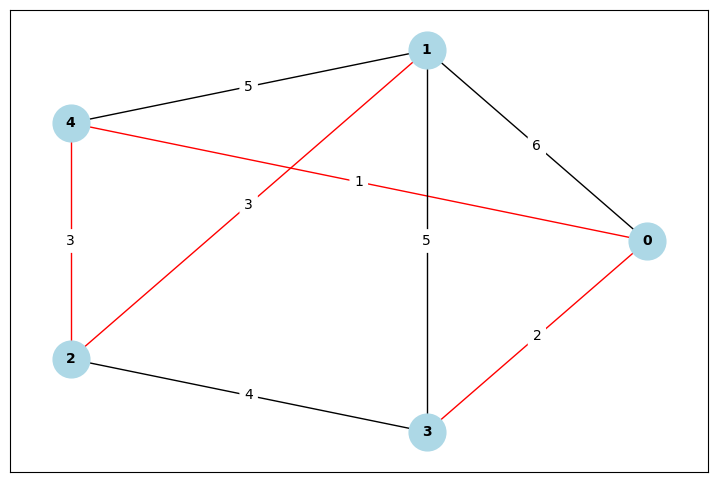

In [179]:
edges = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Inputs\P3\ProblemsCity5.txt')
mst = read_edge_list_from_file('Java Projects\GraphsImplementations\data\Outputs\P3\SolutionsCity5.txt')
plot_graph(edges,directed=False,weighted=True,mst = mst)

## Parte 4. Problema de la distribución de libros

Una empresa de venta de libros tiene una serie de fábricas en las
que ensambla los libros para vender a diferentes librerias. También cuenta con
una serie de camiones para hacer la distribución. De cada camión se conoce la
cantidad máxima de libros que puede transportar. Finalmente, la empresa
cuenta con unas bodegas para guardar temporalmente libros. Cada bodega
tiene una cantidad máxima de libros que puede guardar, pero tiene como
restricción que no se pueden dejar libros de un dia para otro. Para facilitar la
organización de las rutas, cada camión hace un solo viaje diario y cubre una
sola ruta, ya sea desde una fábrica hasta una librería, desde una fábrica hasta
una bodega o desde una bodega hasta una librería. Dados los puntos de inicio y
llegada de cada camión y las cantidades máximas de libros que puede
almacenar cada camión y cada bodega, determinar cuantos libros se pueden
transportar como máximo en un dia desde las fábricas hasta las librerías.

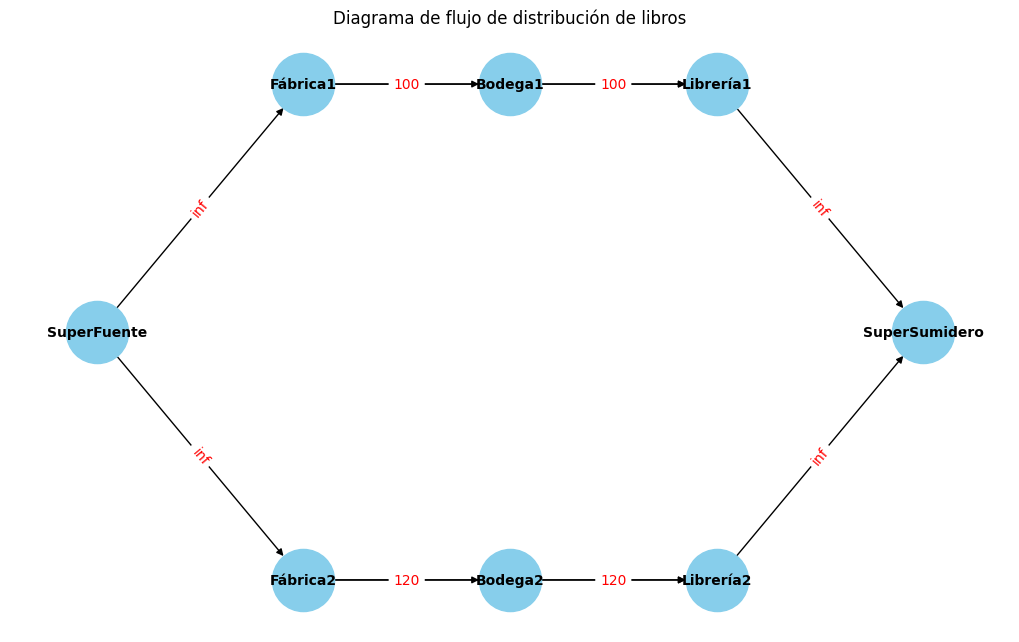

In [150]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo dirigido
G = nx.DiGraph()

# Añadir arcos con capacidad
G.add_edge("SuperFuente", "Fábrica1", capacity=float('inf'))
G.add_edge("SuperFuente", "Fábrica2", capacity=float('inf'))

G.add_edge("Fábrica1", "Bodega1", capacity=100)
G.add_edge("Fábrica1", "Librería1", capacity=150)
G.add_edge("Bodega1", "Librería1", capacity=100)

# Añadir más arcos
G.add_edge("Fábrica2", "Bodega2", capacity=120)
G.add_edge("Bodega2", "Librería2", capacity=120)
G.add_edge("Fábrica2", "Librería2", capacity=150)

# Añadir arcos hacia el SuperSumidero
G.add_edge("Librería1", "SuperSumidero", capacity=float('inf'))
G.add_edge("Librería2", "SuperSumidero", capacity=float('inf'))

# Posición de los nodos en el plano
pos = {
    "SuperFuente": (-1, 1),
    "Fábrica1": (0, 2),
    "Fábrica2": (0, 0),
    "Bodega1": (1, 2),
    "Bodega2": (1, 0),
    "Librería1": (2, 2),
    "Librería2": (2, 0),
    "SuperSumidero": (3, 1)
}

# Dibujar nodos y arcos
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", arrows=True, font_size=10, font_weight='bold')

# Añadir etiquetas de capacidad a los arcos
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Mostrar el grafo
plt.title("Diagrama de flujo de distribución de libros")
plt.show()